# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import log_loss
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.model_selection import GridSearchCV,KFold,LeaveOneOut
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.manifold import Isomap
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
import umap

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Define functions

In [2]:
def ConvertLabels(labels):
    #labels = np.asarray(labels)
    #for label in range(len(labels))
     #   print(label)
    column_name = 'label'
    labels.loc[colon_label[column_name] > 0] = 1
    labels.loc[colon_label[column_name] < 0] = 0
    
    return labels

# Read data

In [3]:
colon       = pd.read_csv('colonCancerData.csv', index_col=0)
colon_label = pd.read_csv('label.csv')
colon_label = ConvertLabels(colon_label).squeeze(1)
data_label  = pd.concat([colon, colon_label], axis = 1, sort= False)

In [4]:
print('colon.shape:', colon.shape)
print('colon_label.shape', colon_label.shape)
print('data_label.shape', data_label.shape)

colon.shape: (62, 2000)
colon_label.shape (62,)
data_label.shape (62, 2001)


# Split data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(colon, colon_label, test_size=0.2, random_state=1234)

In [6]:
print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shape:', y_test.shape)

X_train.shape: (49, 2000)
X_test.shape: (13, 2000)
y_train.shape: (49,)
y_test.shape: (13,)


# Preprocess data

In [18]:
scaler   = StandardScaler()
colon_sc = scaler.fit_transform(colon)
X_train  = scaler.fit_transform(X_train)

# Check data labels

In [109]:
for i, label in enumerate(colon_label):
    if label == 1:
        print(i + 1, label)

2 1
4 1
6 1
8 1
10 1
12 1
14 1
16 1
18 1
20 1
22 1
24 1
39 1
42 1
43 1
48 1
50 1
51 1
54 1
55 1
60 1
62 1


In [110]:
for i, label in enumerate(colon_label):
    if label == 0:
        print(i + 1, label)

1 0
3 0
5 0
7 0
9 0
11 0
13 0
15 0
17 0
19 0
21 0
23 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
40 0
41 0
44 0
45 0
46 0
47 0
49 0
52 0
53 0
56 0
57 0
58 0
59 0
61 0


# Create data clustering

## Hierarchical clustering for genes

The following picture shows a hierarchical clustering for genes that is created by iteratively joining 2 closest clusters starting from singleton clusters. After joining a pair of clusters, the distance between all the new joined clusters and all other clusters are recalculated. In fact, the average linkage method that measures the average distances between the members of 2 clusters is used.

When setting a distance threshold of 7.5, we can see that there are 3 major gene clusters along with some smaller gene clusters. We hypothesize potentially, simlar genes within a cluster are related to each other, such as being in a same function group. Although hierarchical clustering can be a good data exploratory technique, but it is very difficult to verify our hypothesis because of the large amount of genes (2000) involved.

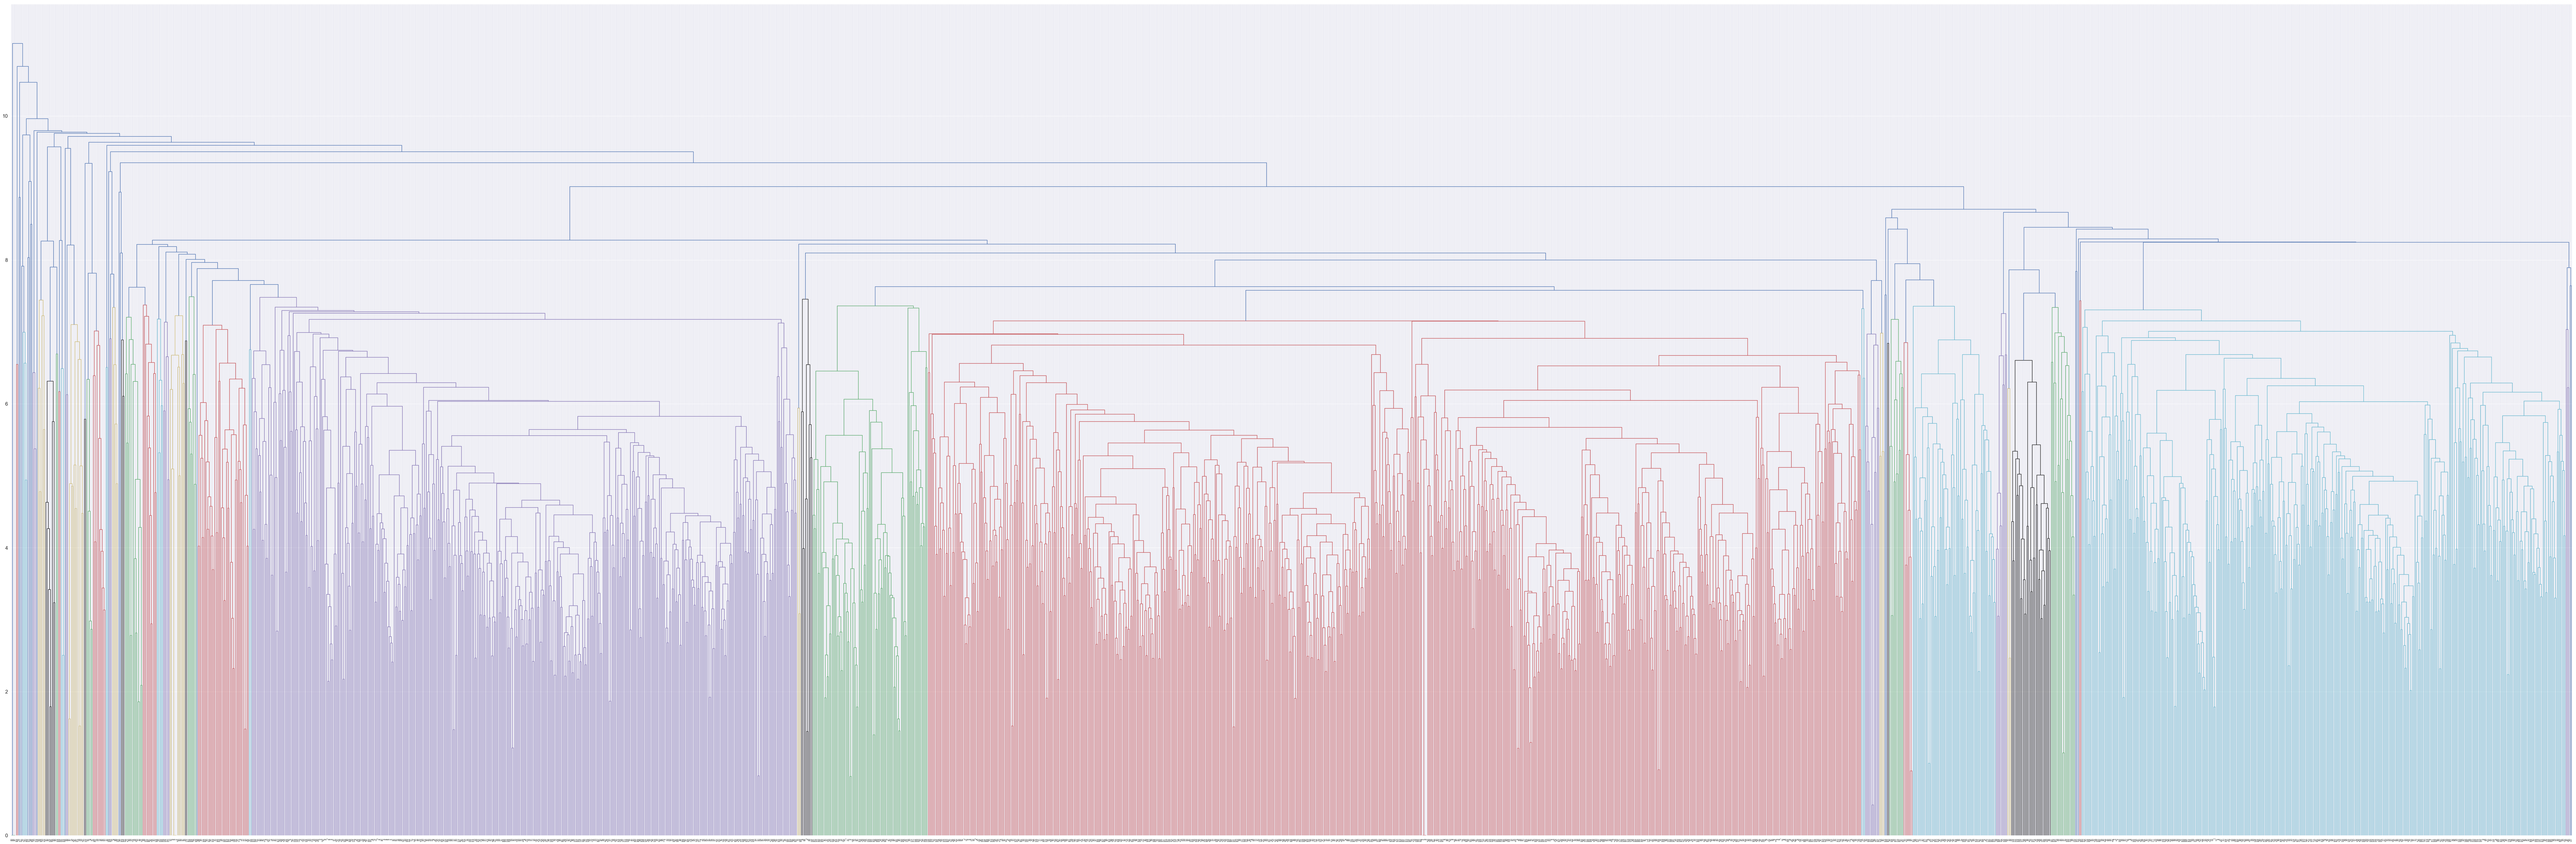

In [70]:
linked    = linkage(colon_sc.T, 'average')
labelList = range(1, 2001)
plt.figure(figsize=(150, 50))
dendrogram(linked,
           orientation='top',
           color_threshold=7.5,
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()
#plt.savefig('GeneHierarchicalClusteringAverage.png')

NOTE: Ignore the following picture for interim report.

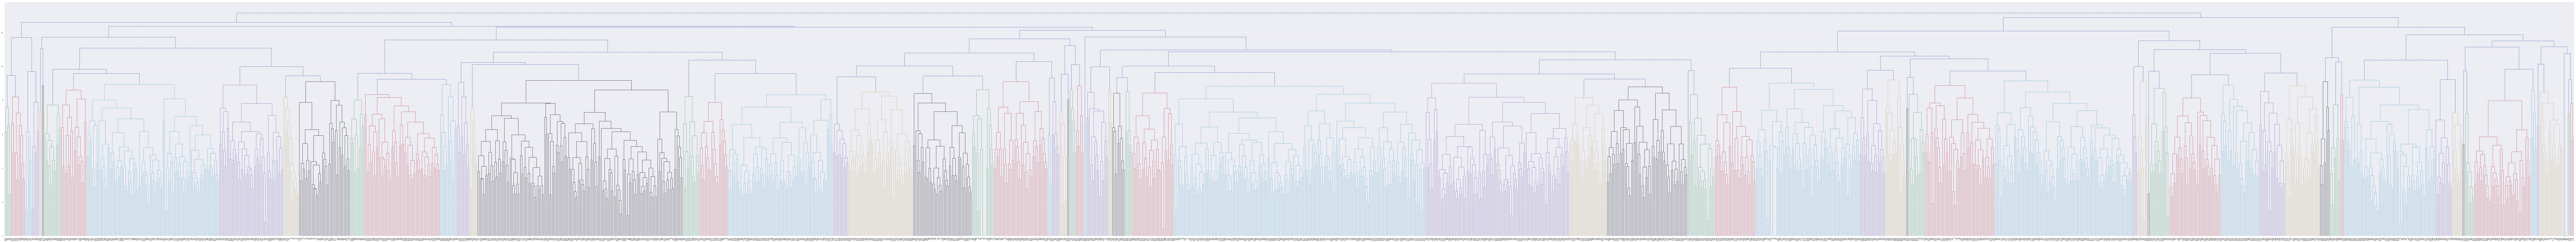

In [29]:
linked    = linkage(colon_sc.T, 'complete')
labelList = range(1, 2001)
plt.figure(figsize=(300, 28))
dendrogram(linked,
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=10)
plt.show()
#plt.savefig('GeneHierarchicalClusteringComplete.png')

NOTE: Ignore the following picture for interim report.

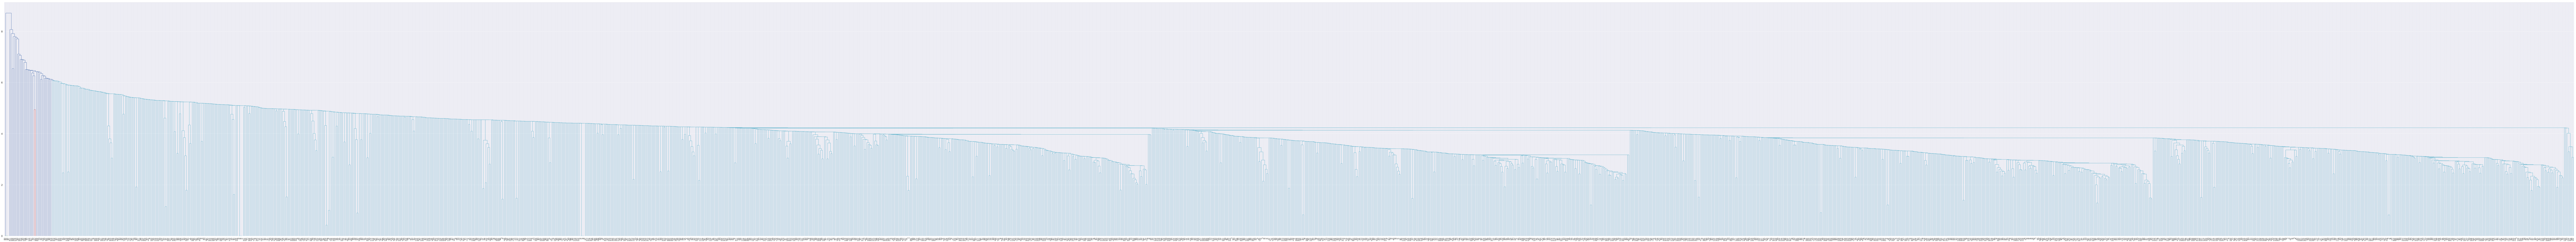

In [49]:
linked    = linkage(colon_sc.T, 'single')
labelList = range(1, 2001)
plt.figure(figsize=(300, 28))
dendrogram(linked,
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=10)
plt.show()
#plt.savefig('GeneHierarchicalClusteringSingle.png')

## Hierarchical clustering for tissues

The following picture shows a hierarchical clustering for tissues. Similarly, the clustering is created by iteratively joining 2 closest clusters starting from singleton clusters. The common average linkage method is used.

When setting a distance threshold of 53, we can see that normal tissues 2, 10, 12, 22, 42, 48, 50, and 54 stay inside the same cluster, which is coloured in light blue in the picture below. Then, almost all of the remaining healthy tissues (4, 6, 8, 14, 16, 18, 20, 24, 39, 51, 55, 60, 62) stay inside the largest red cluster. The only exception is the healthy tissue 43 which stays far away from both the red and light blue clusters. Lastly, although some cancer tissues are also inside the red and light blue clusters, the 2 outer clusters which are far away from the red and light blue clusters consists mainly of only cancer tissues.

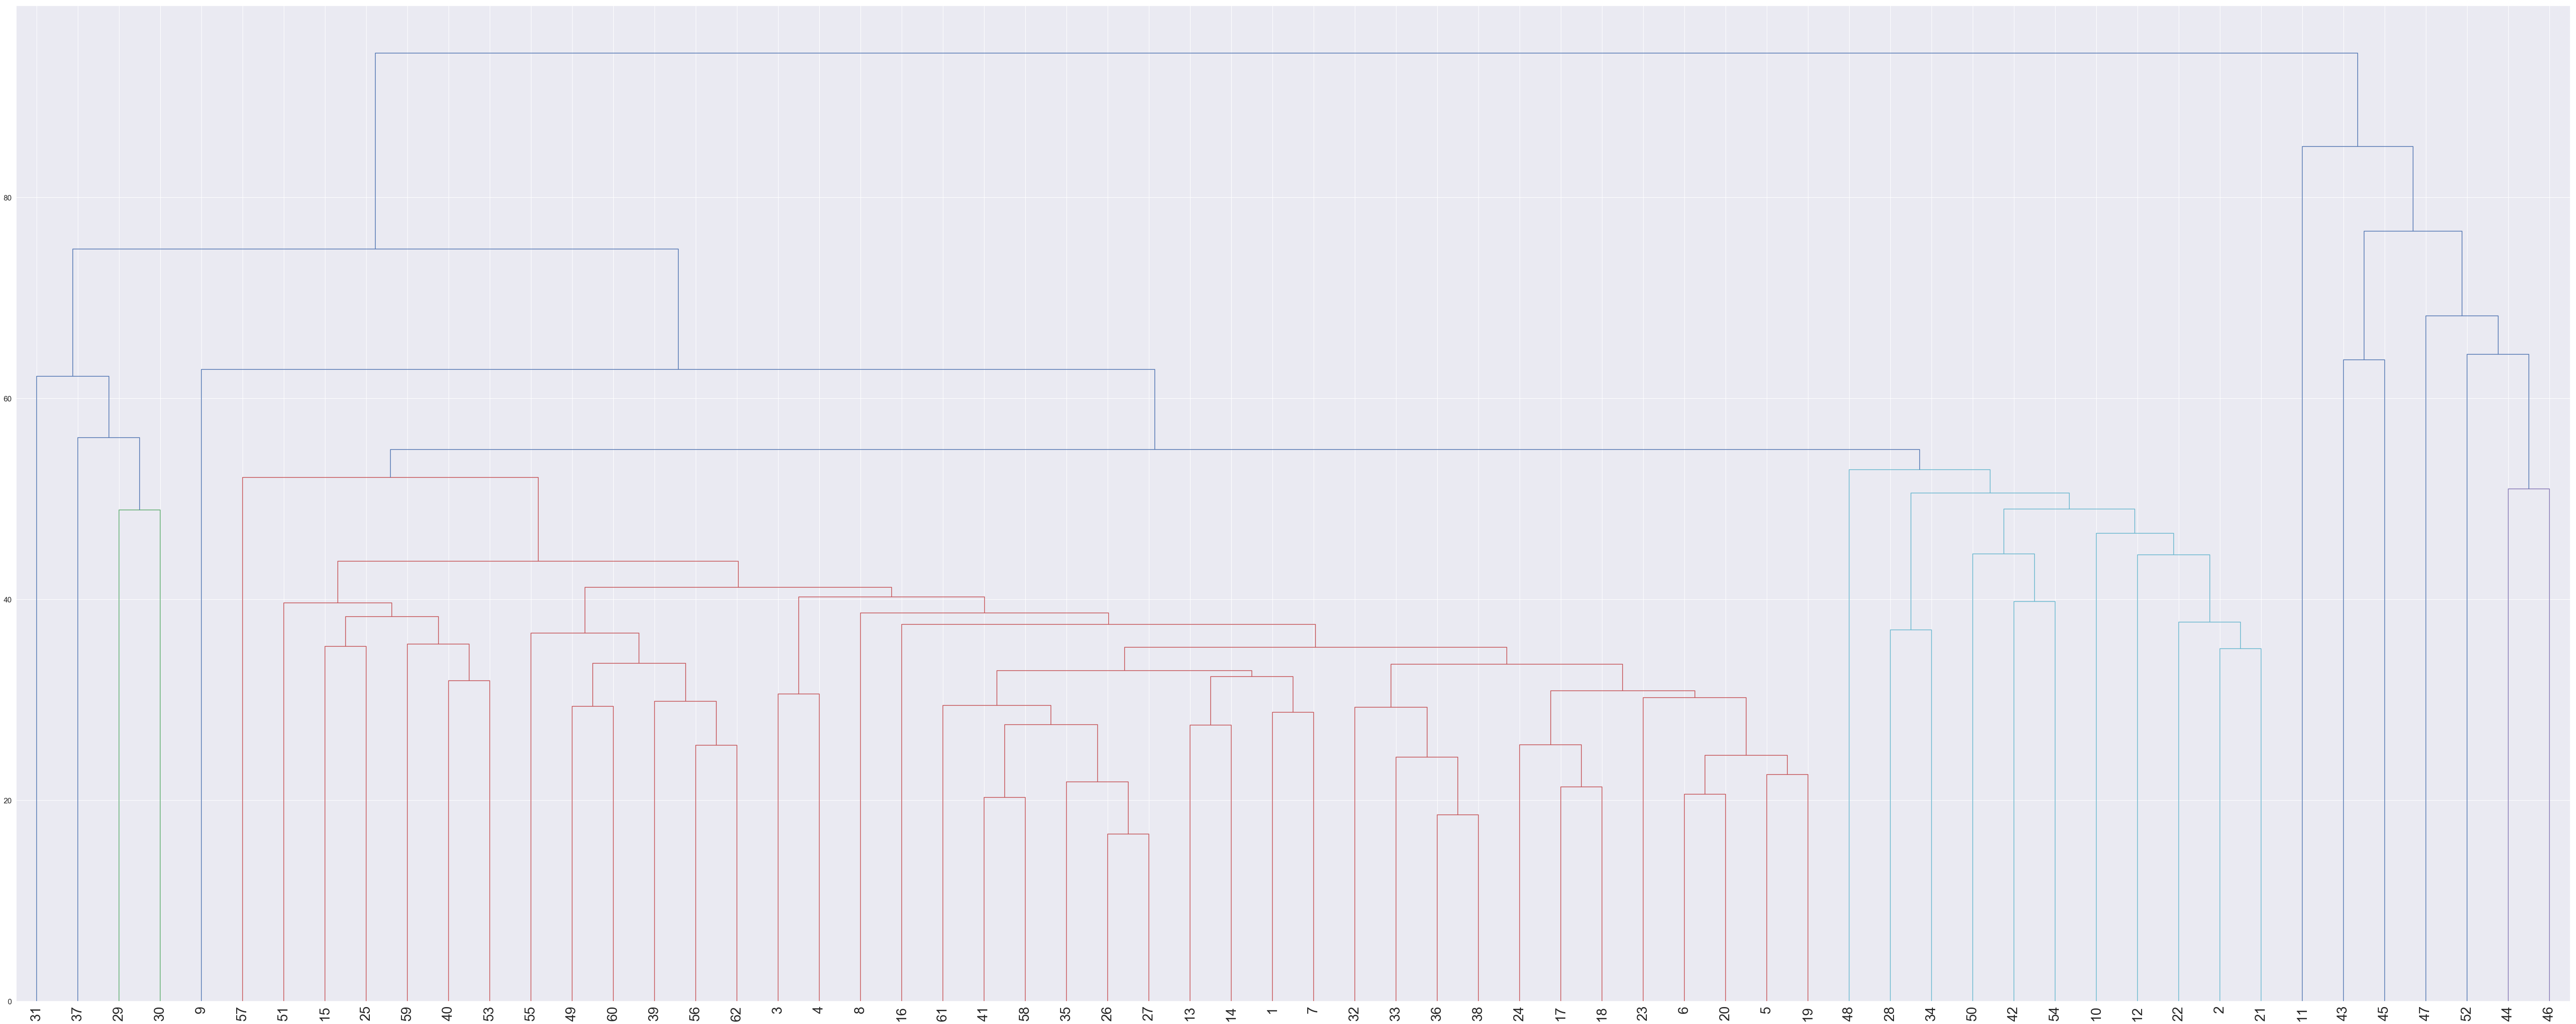

In [73]:
linked    = linkage(colon_sc, 'average')
labelList = range(1, 63)
plt.figure(figsize=(100, 40))
dendrogram(linked,
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           color_threshold=53,
           show_leaf_counts=True,
           leaf_font_size=30)
#plt.show()
plt.savefig('PatientHierarchicalClusteringAverage.png')

NOTE: Ignore the following picture for interim report.

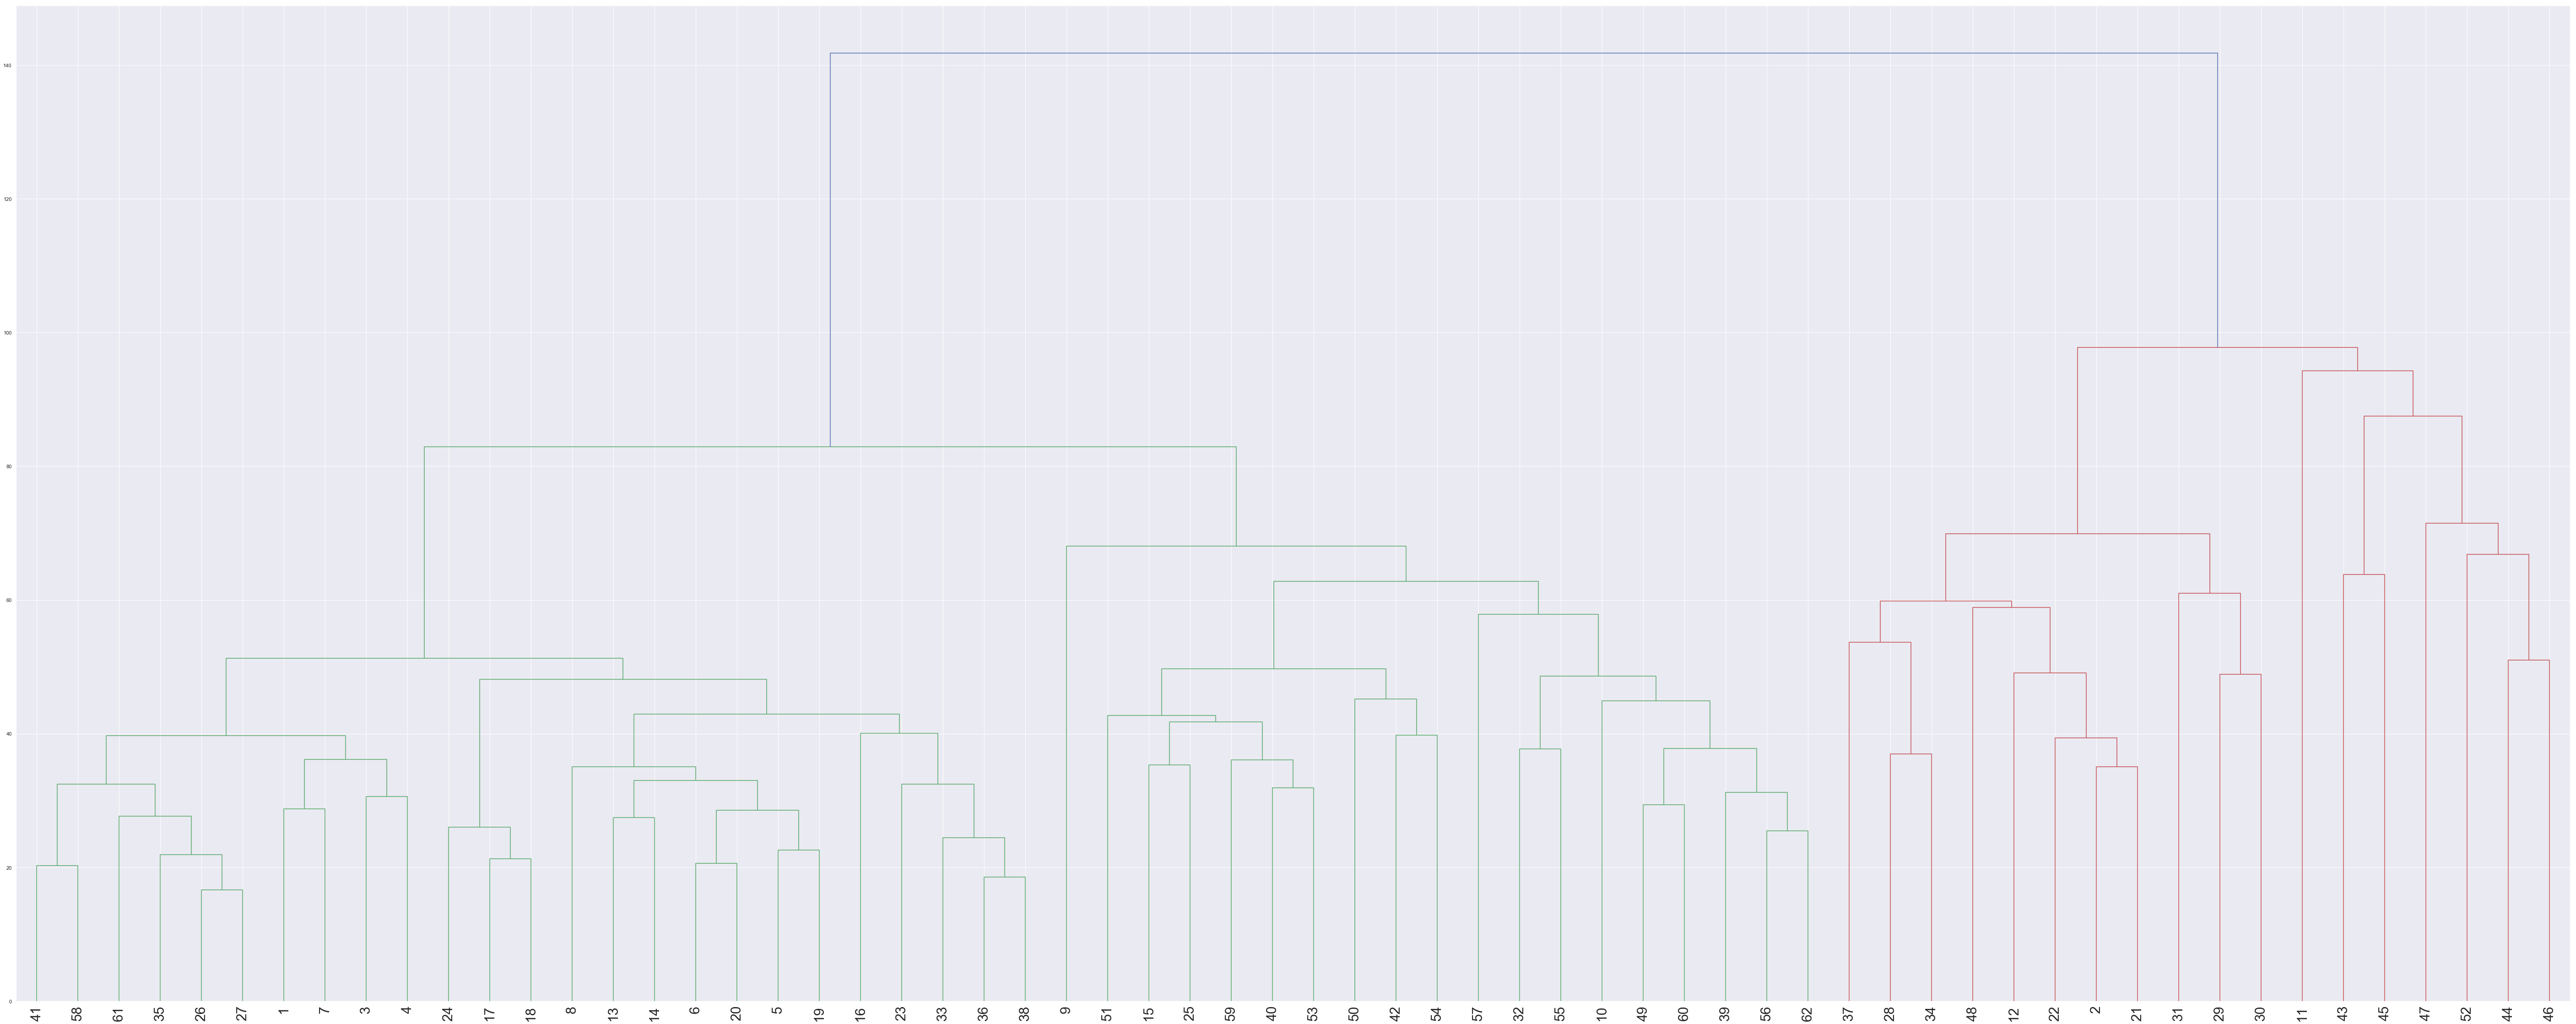

In [32]:
linked    = linkage(colon_sc, 'complete')
labelList = range(1, 63)
plt.figure(figsize=(100, 40))
dendrogram(linked,
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=30)
#plt.show()
plt.savefig('PatientHierarchicalClusteringComplete.png')

NOTE: Ignore the following picture for interim report.

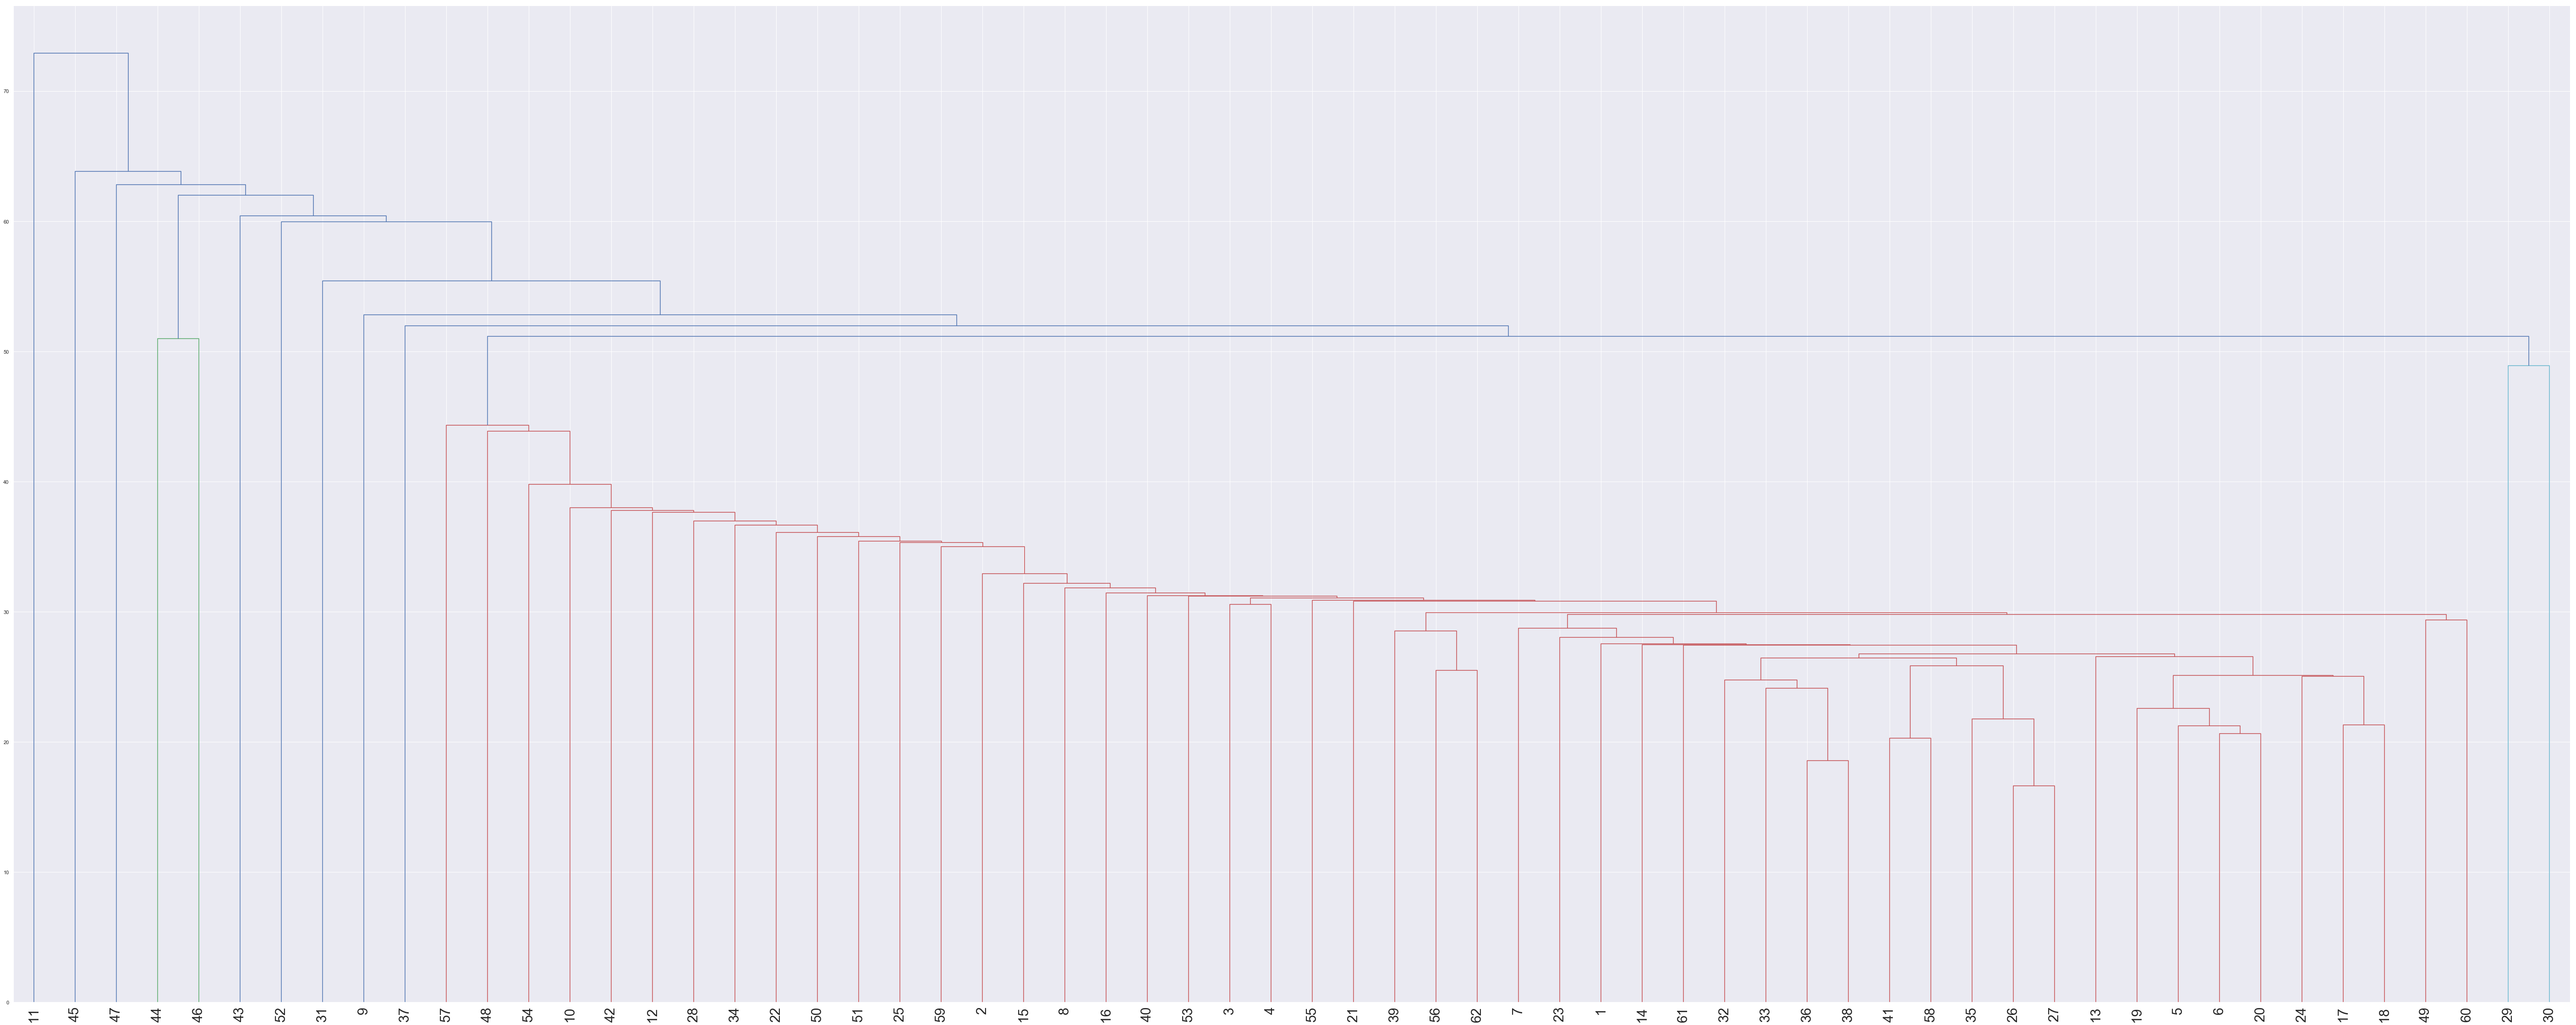

In [33]:
linked    = linkage(colon_sc, 'single')
labelList = range(1, 63)
plt.figure(figsize=(100, 40))
dendrogram(linked,
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=30)
#plt.show()
plt.savefig('PatientHierarchicalClusteringSingle.png')

## Cluster maps

A cluster map for both tissues (rows) and genes (columns) is shown below. Again, the common average linkage method is used. The grid cells show the standardised value of each gene expression, with light red indicating a positive value, and dark red indicating a negative value.

Although we can see that tissues at the bottom of the cluster map tend to have more positive values (light red grid cells), but those tissues are made up of both healthy tissues (10, 42, 43, 51) and cancer tissues (44, 45, 46). Hence, from this analysis, we think that the data is quite noisy and will require representative features selection before classification can be made.

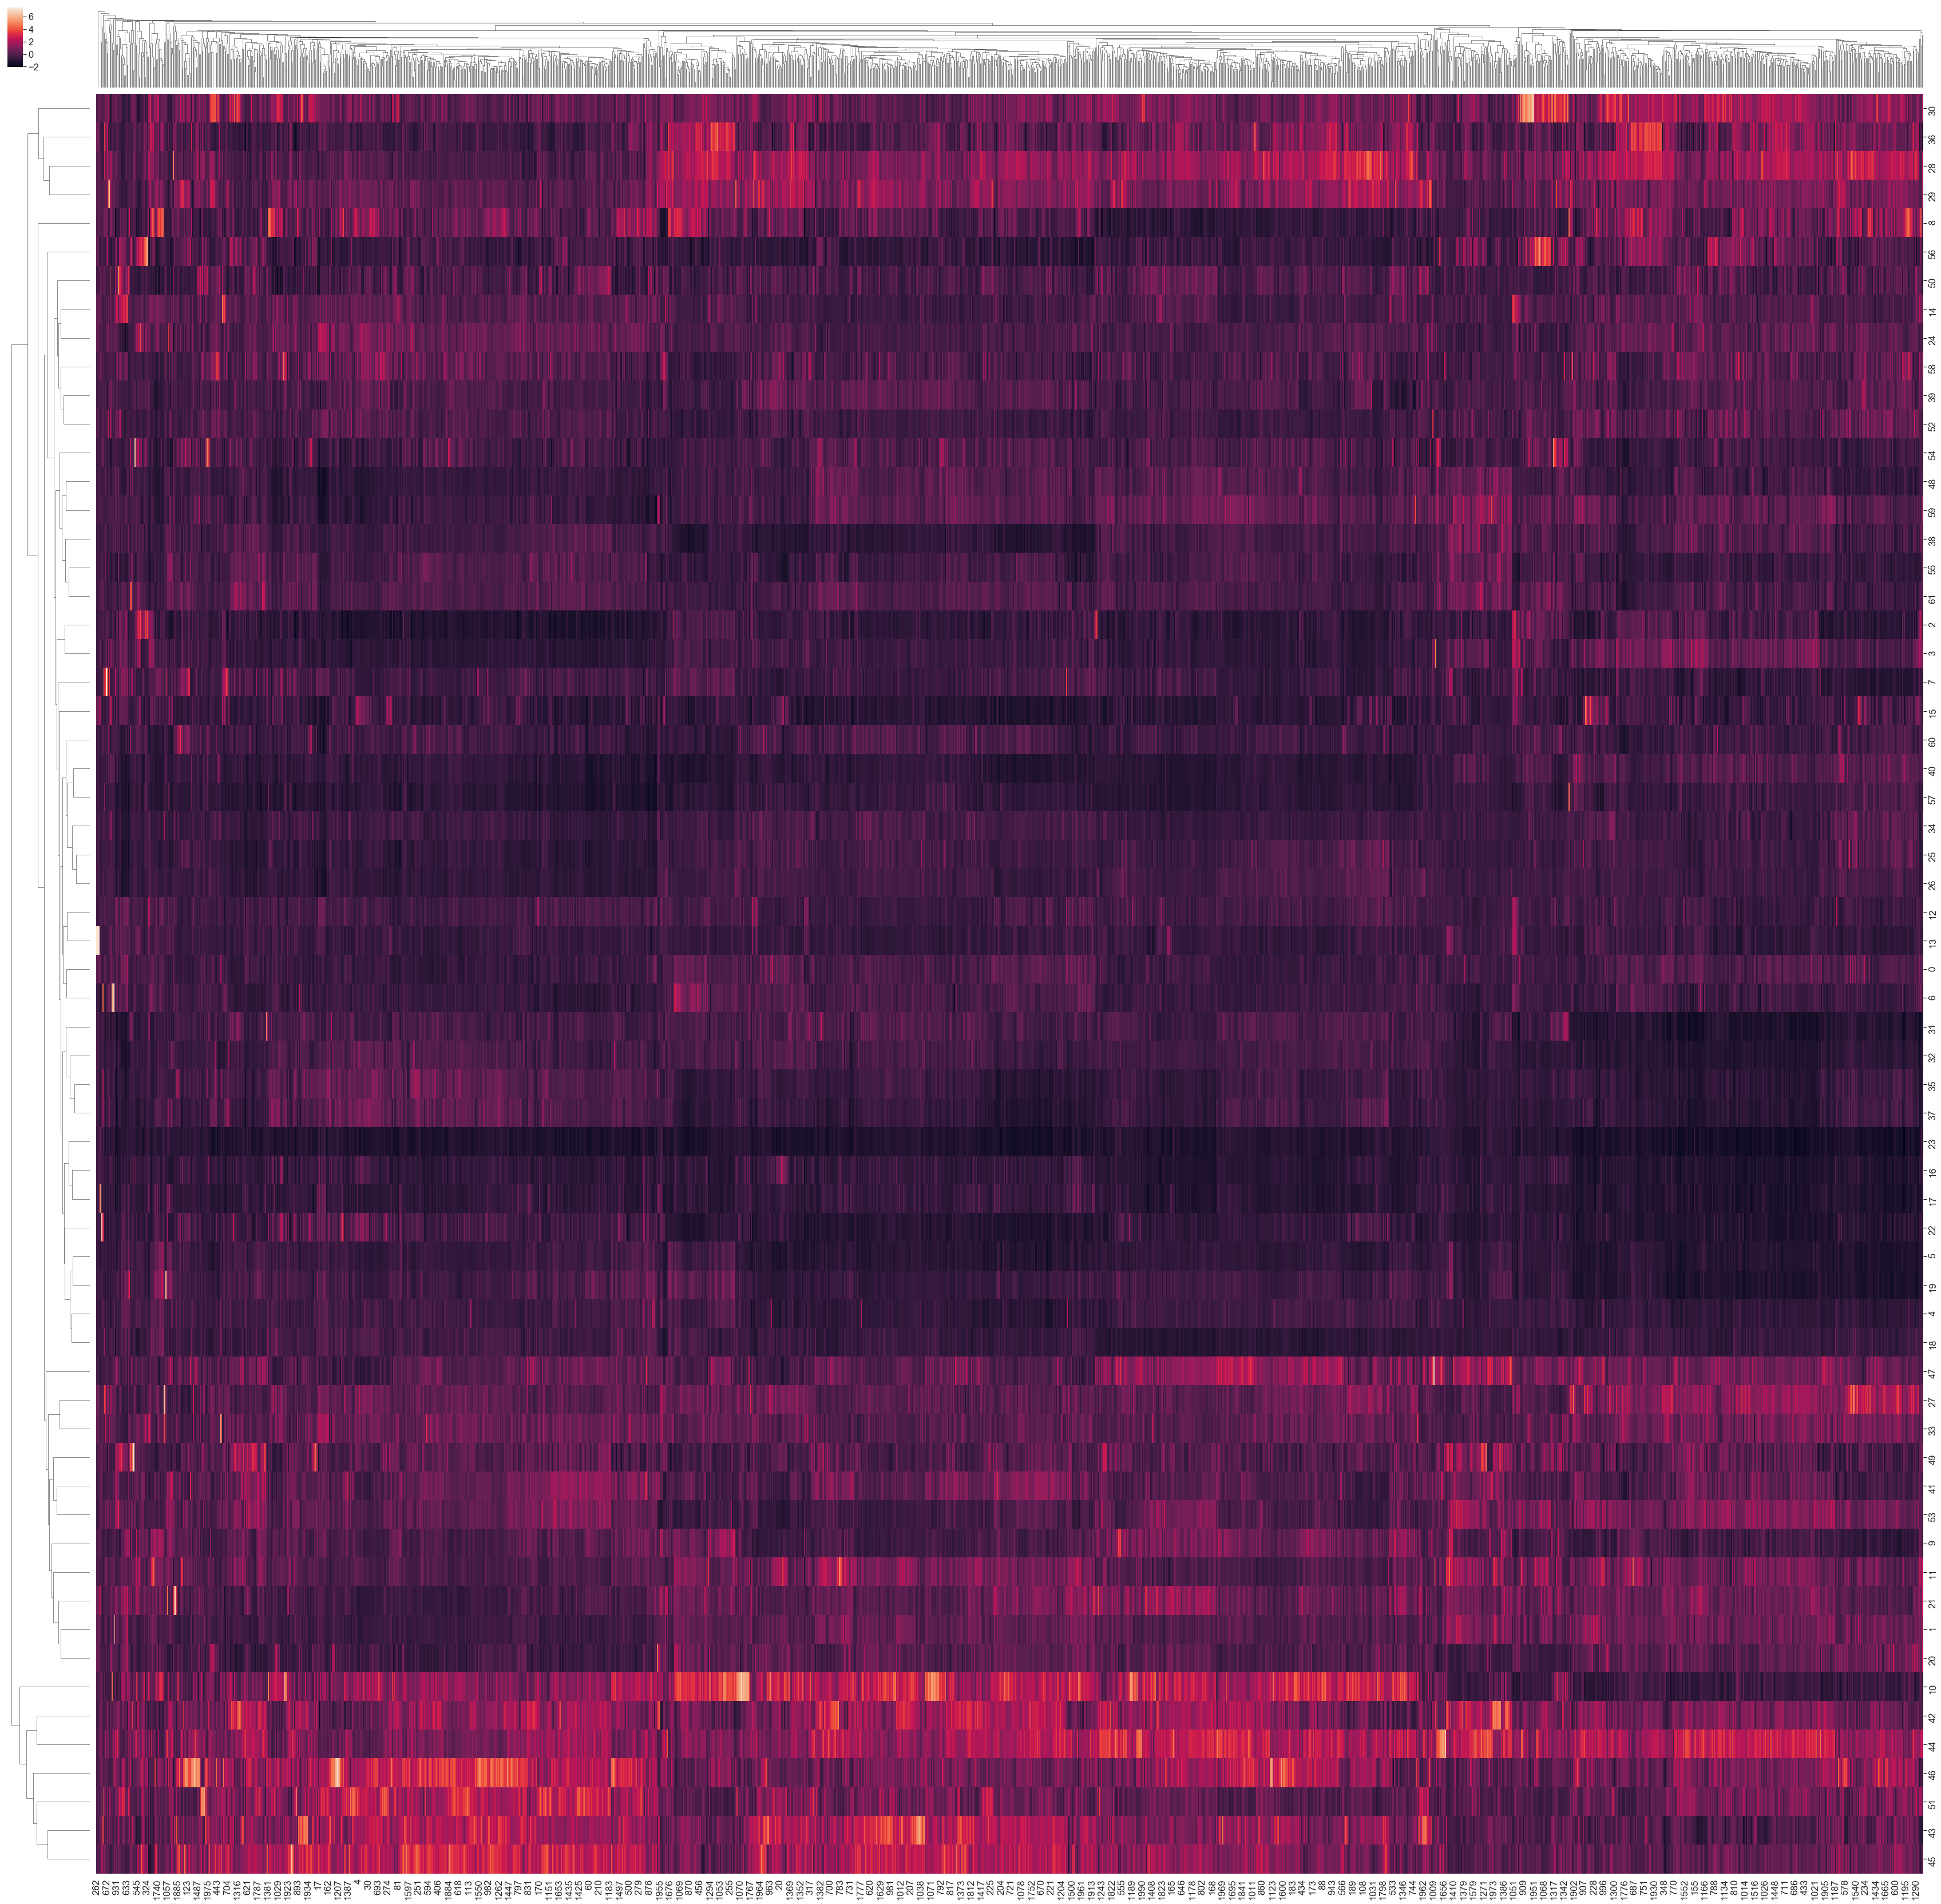

In [74]:
sns.set(color_codes=True)
sns.set(font_scale=1.5)
sns.clustermap(colon_sc, method="average", figsize=(60, 60))

NOTE: Ignore the following picture for interim report.

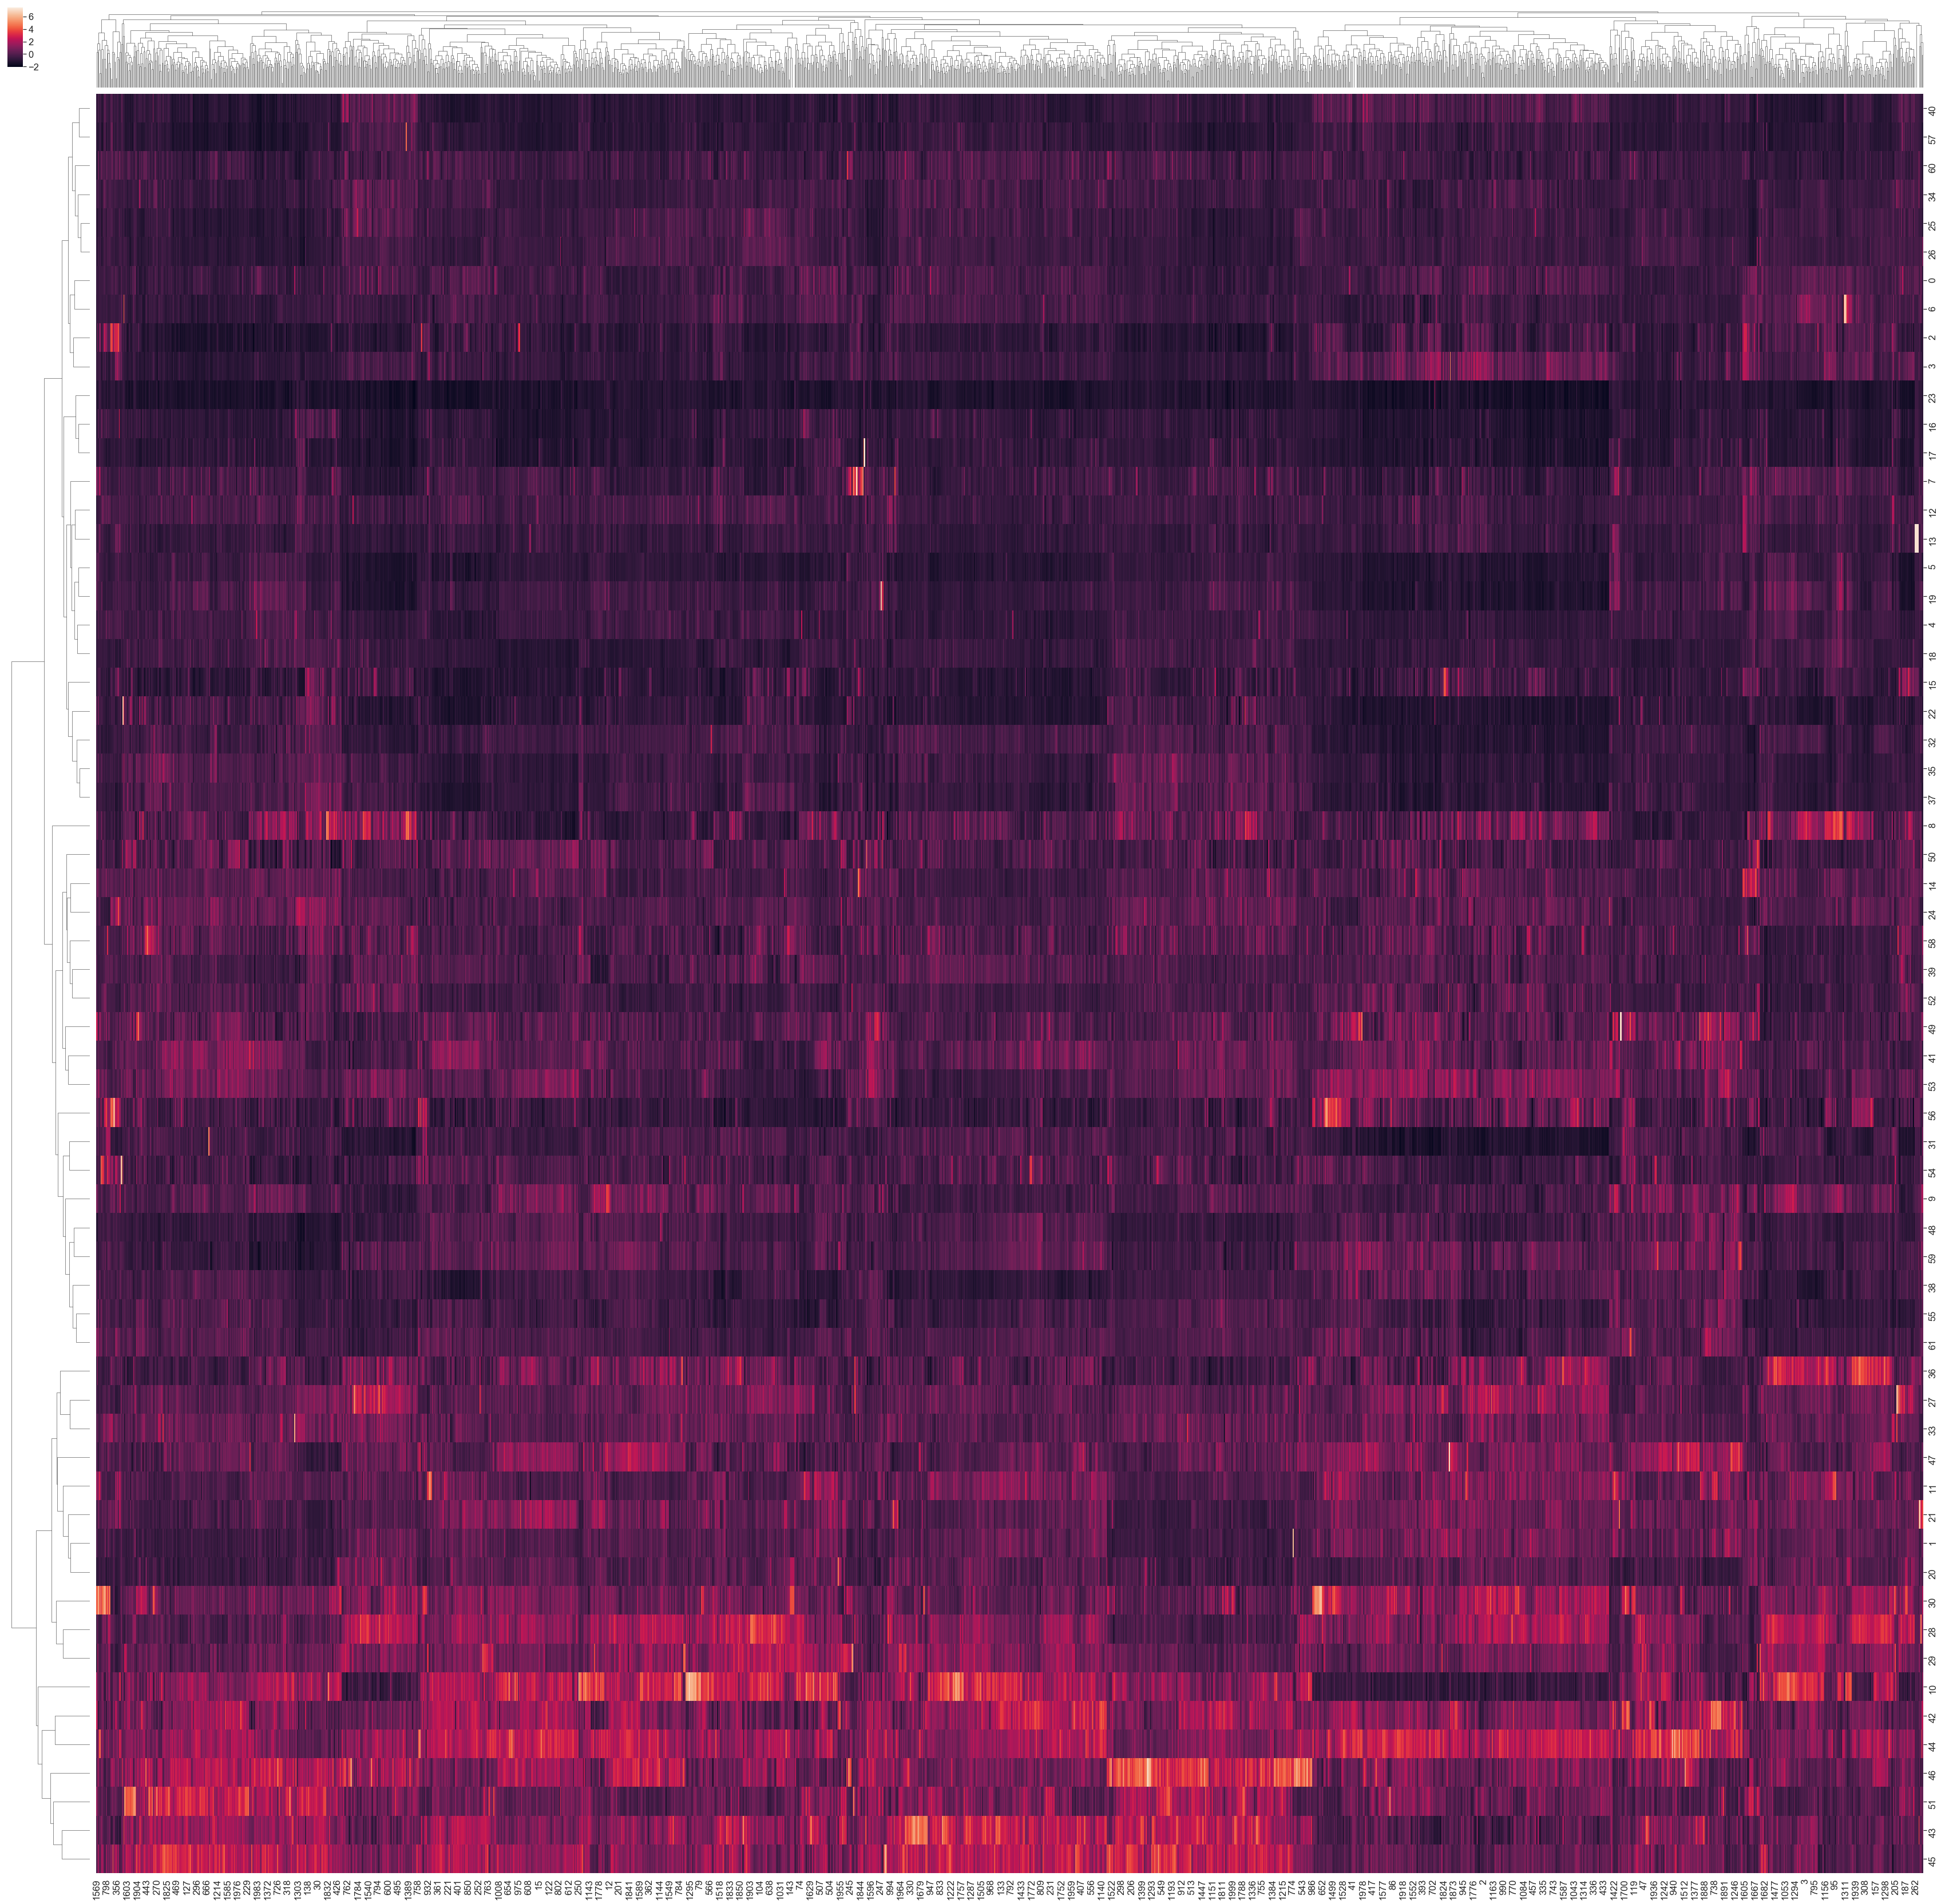

In [75]:
sns.clustermap(colon_sc, method="complete", figsize=(60, 60))

NOTE: Ignore the following picture for interim report.

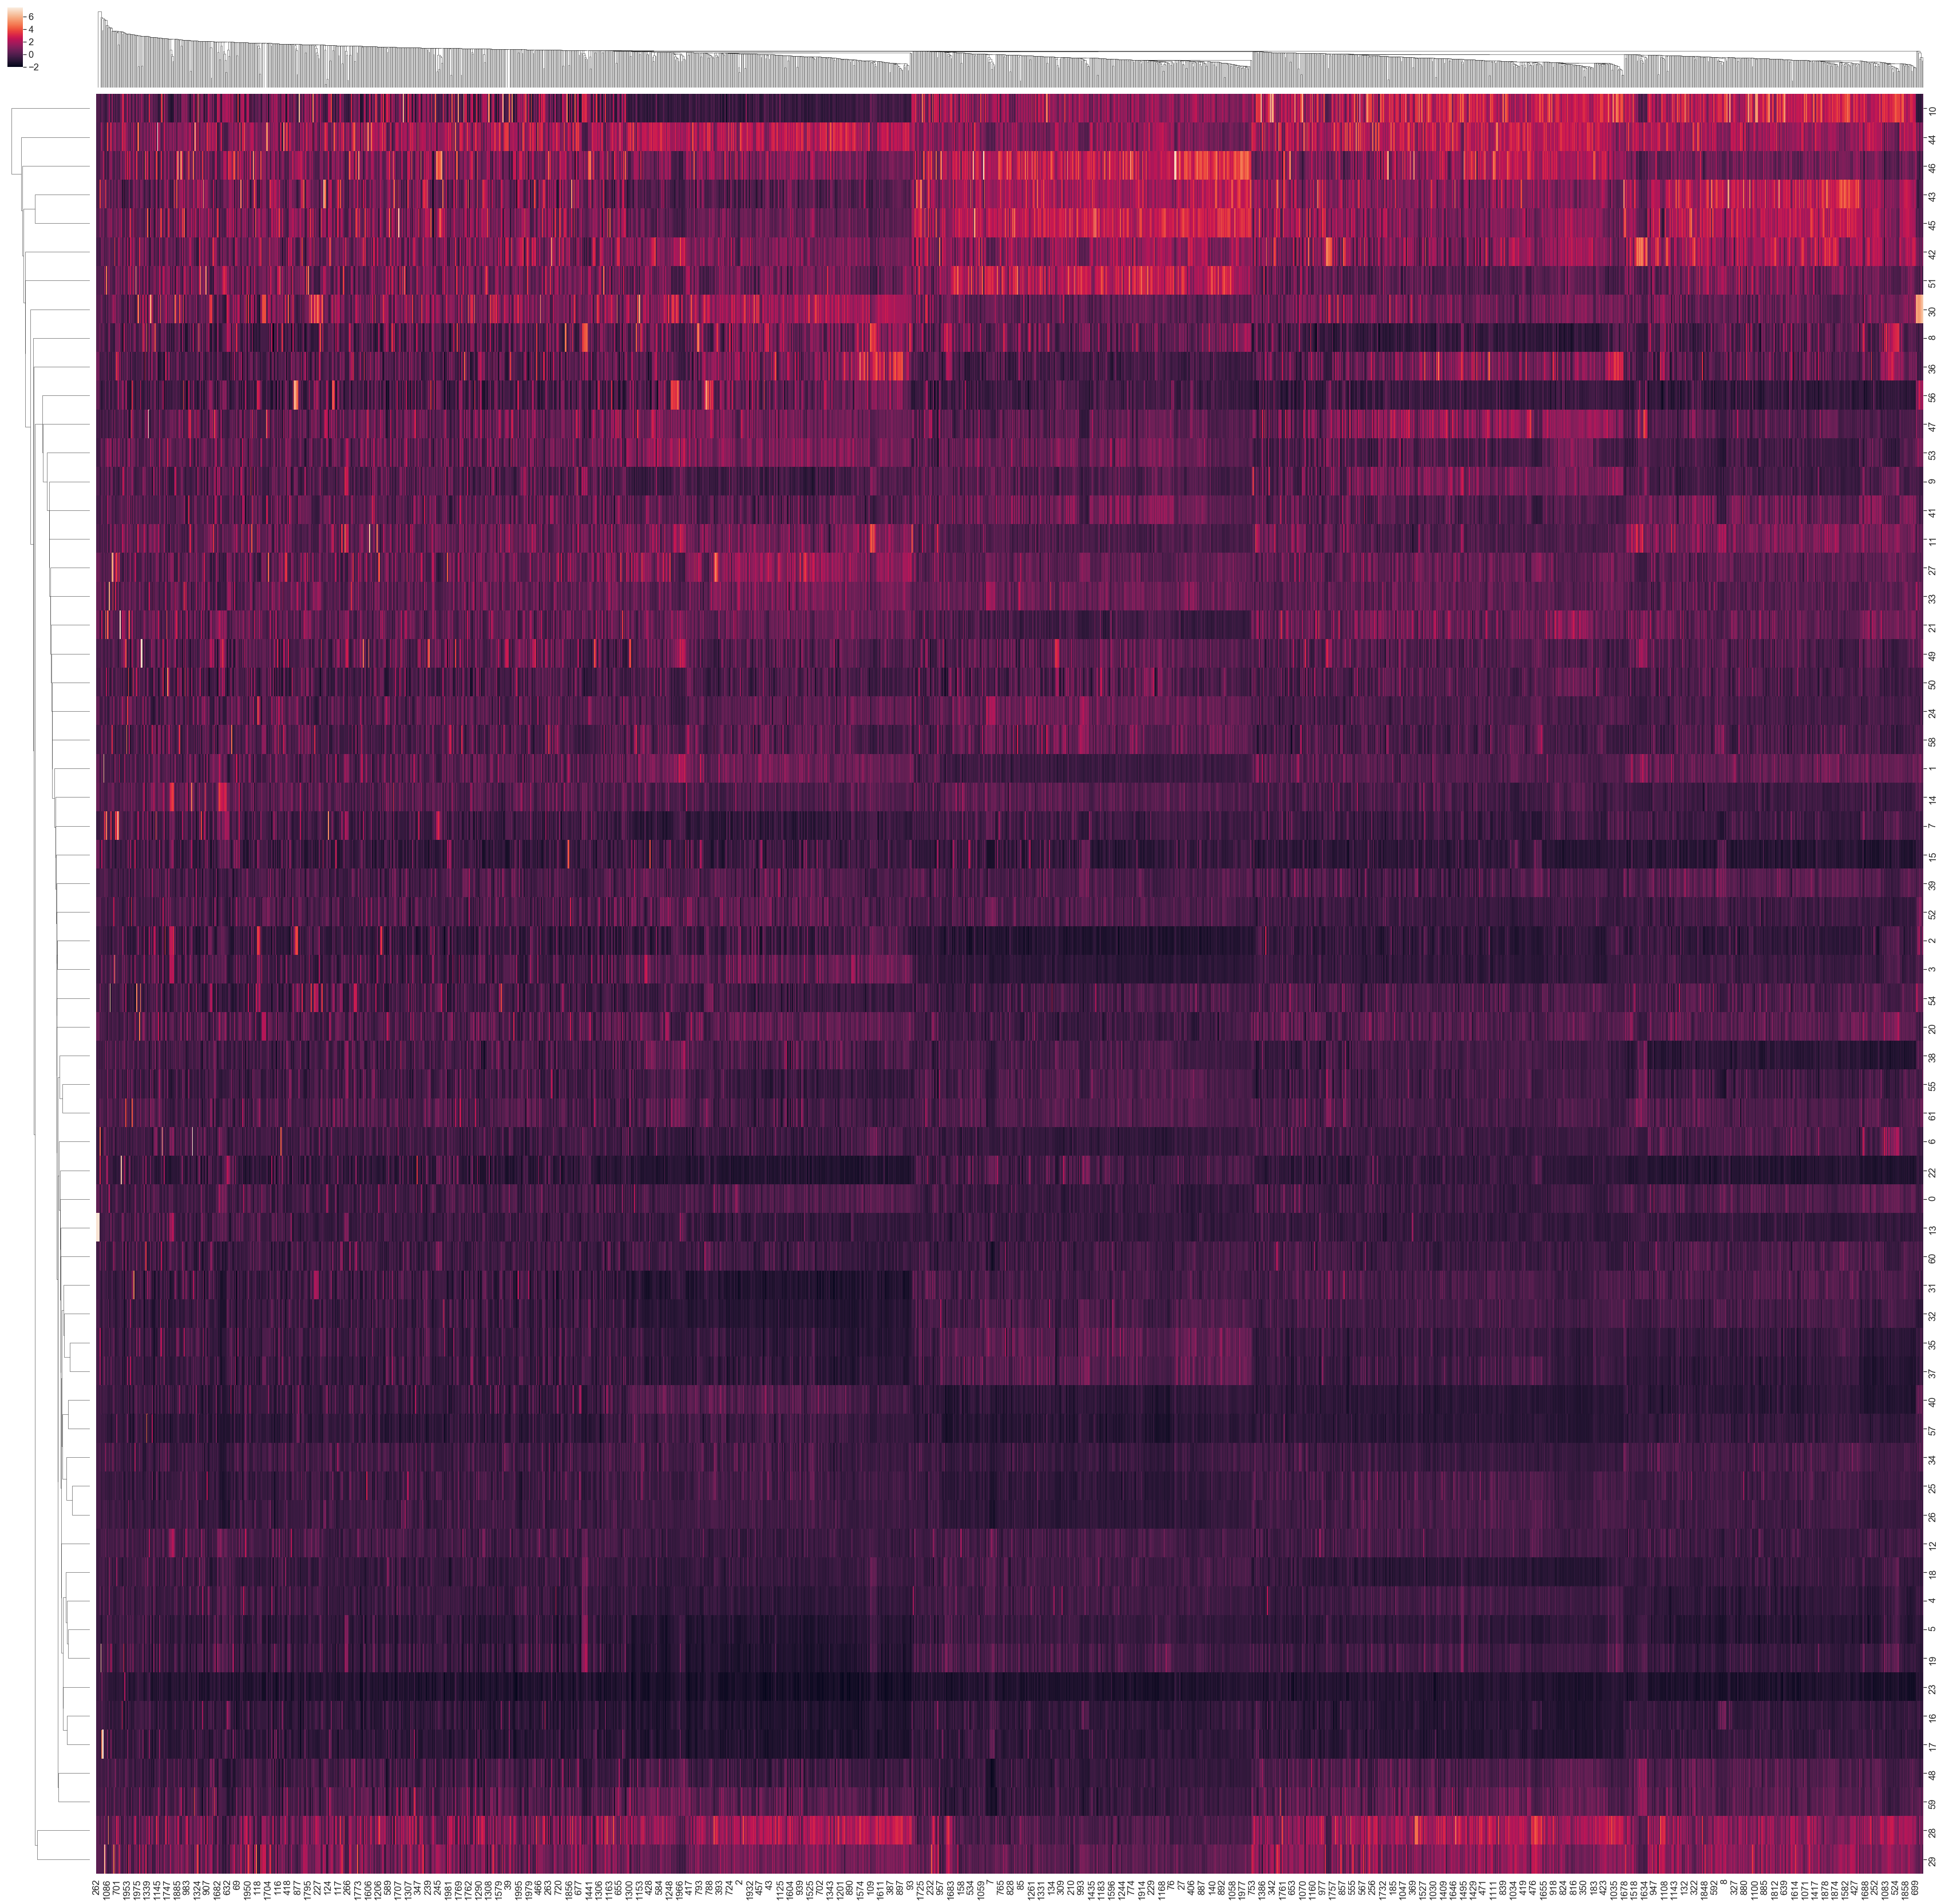

In [76]:
sns.clustermap(colon_sc, method="single", figsize=(60, 60))